<a href="https://colab.research.google.com/github/FlavioGermanoPinheiro/unsupervised-learning/blob/main/Atividade_1_K_Means_Fl%C3%A1vio_Germano_Pinheiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

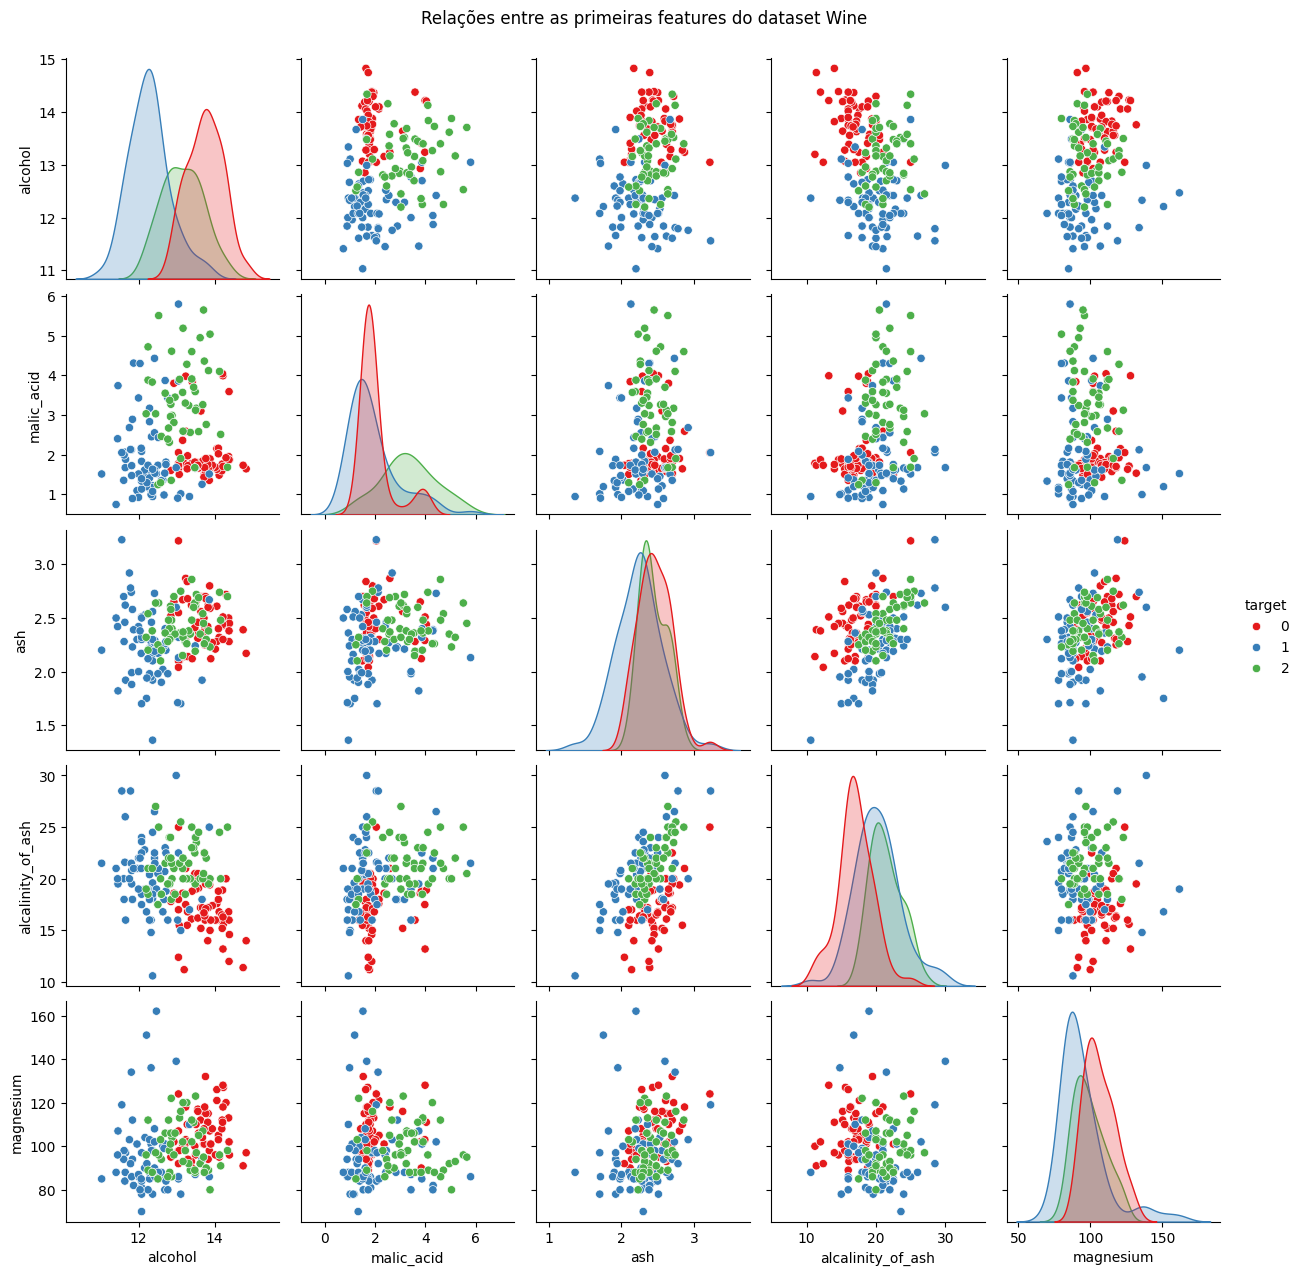

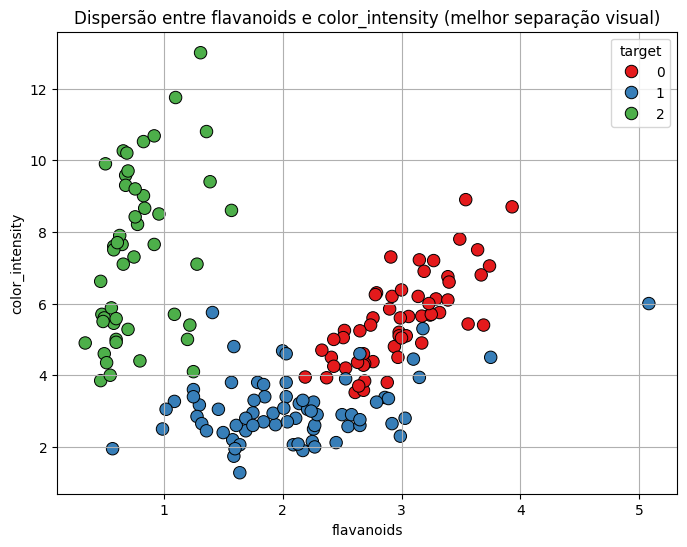

In [ ]:

# Tarefa 1: Análise e Seleção de Features - Wine Dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Carregar o dataset Wine:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Criar um DataFrame com as features e o target:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 1) Visualizar as relações entre as features:
sns.pairplot(df.iloc[:, :5].join(df['target']), hue='target', diag_kind='kde', palette='Set1')
plt.suptitle("Relações entre as primeiras features do dataset Wine", y=1.02)
plt.show()

# 2) Escolha do melhor par de features:
# Após observar o gráfico, os pares "flavanoids" e "color_intensity" mostraram uma boa separação visual entre as 3 classes.
f1 = 'flavanoids'
f2 = 'color_intensity'

# 3) Gráfico de dispersão do par selecionado:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x=f1, y=f2,
    hue='target',
    palette='Set1',
    edgecolor='black',
    s=80
)
plt.title(f"Dispersão entre {f1} e {f2} (melhor separação visual)")
plt.xlabel(f1)
plt.ylabel(f2)
plt.grid(True)
plt.show()



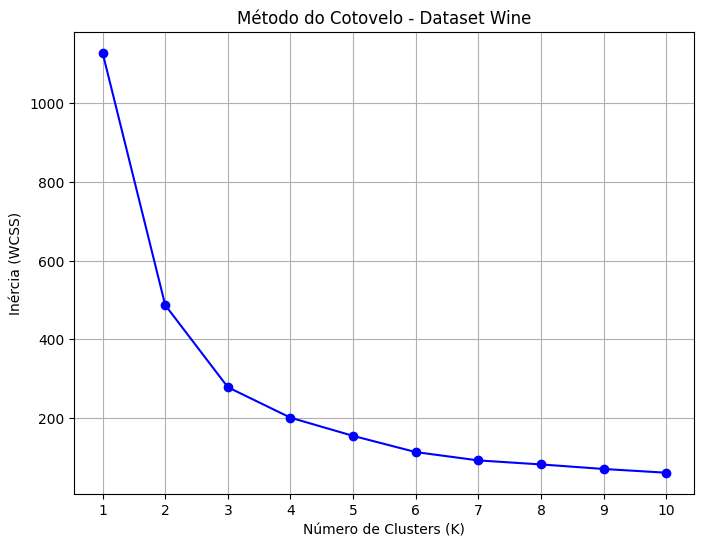

Observando o gráfico do Método do Cotovelo, o ponto onde a queda da inércia começa a diminuir significativamente indica o K ótimo.
No dataset Wine com essas features, o cotovelo aparece em torno de K = 3,
o que coincide com o número real de cultivares (3 tipos de uva).


In [ ]:
# Tarefa 2: Encontrando o K Ótimo (Método do Cotovelo)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# Carregar o dataset Wine:
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# Features escolhidas da Tarefa 1:
f1 = 'flavanoids'
f2 = 'color_intensity'

# Selecionar apenas as duas colunas:
f1_idx = feature_names.index(f1)
f2_idx = feature_names.index(f2)
X_pair = X[:, [f1_idx, f2_idx]]

# Método do Cotovelo (K = 1 a 10)
inertias = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pair)
    inertias.append(kmeans.inertia_)

# Gráfico do Cotovelo:
plt.figure(figsize=(8,6))
plt.plot(K_values, inertias, marker='o', linestyle='-', color='blue')
plt.title("Método do Cotovelo - Dataset Wine")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia (WCSS)")
plt.grid(True)
plt.xticks(K_values)
plt.show()

# Interpretação (comentário):
print("Observando o gráfico do Método do Cotovelo, o ponto onde a queda da inércia começa a diminuir significativamente indica o K ótimo.")
print("No Dataset Wine com essas features, o cotovelo aparece em torno de K = 3.")
print("Coincide com o número real de cultivares (3 tipos de uva).")


Taxa de acertos (pureza): 0.7697 (76.97%)


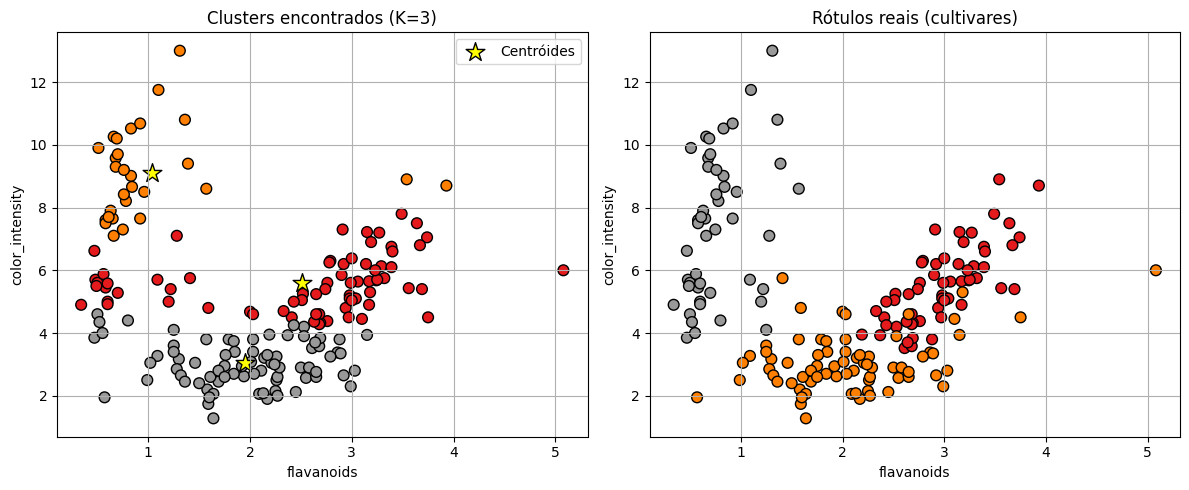


Comentário:
O modelo K-Means atingiu uma pureza de aproximadamente 76.97%.
Isso indica que os clusters formados correspondem bem aos três tipos de vinho do dataset,
mostrando que as variáveis 'flavanoids' e 'color_intensity' são boas para separar as classes.


In [ ]:
# Tarefa 3: Clusterização e Avaliação - Dataset Wine

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from scipy.stats import mode

# Função para calcular pureza (taxa de acertos):
def purity_score(true_labels, cluster_labels, n_clusters):
    correct = 0
    for i in range(n_clusters):
        mask = (cluster_labels == i)
        if np.sum(mask) == 0:
            continue
        dominant = mode(true_labels[mask], keepdims=True)[0][0]
        correct += np.sum(true_labels[mask] == dominant)
    return correct / len(true_labels)

# Carregar dataset e selecionar features:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Features escolhidas da Tarefa 1:
f1 = 'flavanoids'
f2 = 'color_intensity'

# Converter para índices:
f1_idx = feature_names.index(f1)
f2_idx = feature_names.index(f2)

# Selecionar apenas as duas features:
X_pair = X[:, [f1_idx, f2_idx]]

# Treinar modelo com K = 3 (K encontrado na tarefa 1 para treinar seu modelo KMeans):
K = 3
model = KMeans(n_clusters=K, n_init=10, random_state=42)
model.fit(X_pair)
labels = model.labels_

# Calcular pureza (taxa de acertos):
pureza = purity_score(y, labels, K)
print(f"Taxa de acertos (pureza): {pureza:.4f} ({pureza*100:.2f}%)")

# Gráficos de comparação com 2 subplots:
plt.figure(figsize=(12,5))

# Subplot 1: Clusters encontrados pelo K-Means
plt.subplot(1,2,1)
plt.scatter(X_pair[:,0], X_pair[:,1], c=labels, s=60, edgecolor='k', cmap='Set1')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
            s=200, c='yellow', marker='*', edgecolor='black', label='Centróides')
plt.title(f"Clusters encontrados (K={K})")
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()
plt.grid(True)

# Subplot 2: Rótulos reais
plt.subplot(1,2,2)
plt.scatter(X_pair[:,0], X_pair[:,1], c=y, s=60, edgecolor='k', cmap='Set1')
plt.title("Rótulos reais (cultivares)")
plt.xlabel(f1)
plt.ylabel(f2)
plt.grid(True)

plt.tight_layout()
plt.show()

# Comentário sobre o resultado
print("\nComentário:")
print(f"O modelo K-Means atingiu uma pureza de aproximadamente {pureza*100:.2f}%.")
print("Isso indica que os clusters formados representam bem os três tipos de vinho do dataset.")
print("Mostra também que as variáveis 'flavanoids' e 'color_intensity' foram uma boa escolha para separar as classes.")
